In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [5]:
X = data['data']
Y = data['target']

In [6]:
class_names = data['target_names']

In [7]:
feature_names = data['feature_names']

In [8]:
X.shape

(569, 30)

In [9]:
Y.shape

(569,)

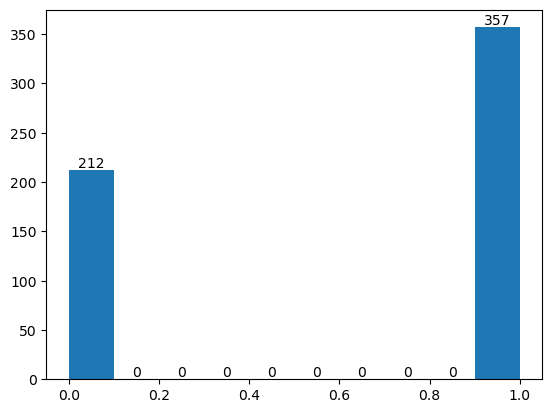

In [10]:
edges, lines, bins = plt.hist(Y)
plt.bar_label(bins)
plt.show()

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=123, stratify=Y)

In [13]:
X_train.shape

(426, 30)

In [14]:
X_test.shape

(143, 30)

In [15]:
# DA BISMO MOGLI DA KORISTIMO PCA, MORAMO DA STANDARDIZUJEMO PODATKE
# NA NORMALNU (0,1) RASPODELU, STOGA KORISITMO STANDARDSCALER KAKO BISMO TO POSTILGI

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(X_train)

StandardScaler()

In [19]:
X_train = pd.DataFrame(scaler.transform(X_train), columns=feature_names)

In [20]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=feature_names)

In [21]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,-0.840843,2.326107,-0.886607,-0.769830,-1.501992,-1.303914,-1.124172,-1.278696,-2.731219,-1.070086,...,-0.903293,2.057077,-0.958214,-0.776411,-1.712137,-1.258445,-1.323604,-1.765536,-2.117294,-1.375005
1,0.264785,0.641217,0.209288,0.152875,-0.379019,-0.627679,-0.462066,-0.404312,-0.676344,-0.821545,...,0.363852,0.987064,0.298069,0.247315,0.299185,-0.312914,-0.023457,0.578261,-0.359413,-0.312829
2,0.086184,1.322050,0.149527,-0.006368,-0.532056,0.374101,0.147606,-0.258494,0.269786,0.075660,...,-0.021623,0.993539,0.173948,-0.136062,0.086002,1.032380,0.613194,0.080396,0.452160,0.959299
3,0.213756,-0.984071,0.175904,0.079747,-1.048470,-0.345898,-0.426017,-0.433948,-0.413940,-0.842029,...,0.175215,-1.193431,0.129619,0.033345,-1.110437,0.147434,0.187002,-0.008454,-0.338807,-0.096940
4,-1.135678,0.084172,-1.131422,-0.979613,0.301613,-0.546485,-1.060835,-0.986011,-0.029575,0.062004,...,-1.163693,-0.439080,-1.174243,-0.936455,-0.240300,-0.850404,-1.275424,-1.423618,-1.014061,-0.923256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,-1.499118,-0.855699,-1.460726,-1.179231,-0.912204,-0.509247,-0.529121,-0.654249,0.484144,0.458030,...,-1.300865,-1.277608,-1.251376,-1.015003,-1.327971,-0.820300,-0.870997,-1.036048,-0.741423,-0.551387
422,-0.806824,1.801155,-0.841684,-0.742443,-1.897513,-1.254967,-0.918343,-1.196739,0.258699,-0.898019,...,-0.870486,1.320532,-0.821385,-0.754390,-1.739981,-0.704899,-0.801531,-1.446443,-0.083605,-0.737052
423,-0.645232,-0.200082,-0.612531,-0.639387,-0.164487,0.228220,-0.287748,-0.454667,0.620889,0.038788,...,-0.630590,0.244044,-0.632839,-0.617581,0.368796,0.307364,0.021608,-0.022241,0.785032,-0.047285
424,0.106028,1.906604,0.187444,0.000408,1.251982,1.074714,0.941679,0.652606,1.862684,1.080748,...,0.232627,1.867680,0.487206,0.096808,1.556533,2.521925,2.044698,0.857066,2.086403,2.675619


In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=2)

In [24]:
pca.fit(X_train, y_train)

PCA(n_components=2)

In [25]:
pca_names = [f'pca_{i}' for i in range(pca.n_components_)]

In [26]:
pca_names

['pca_0', 'pca_1']

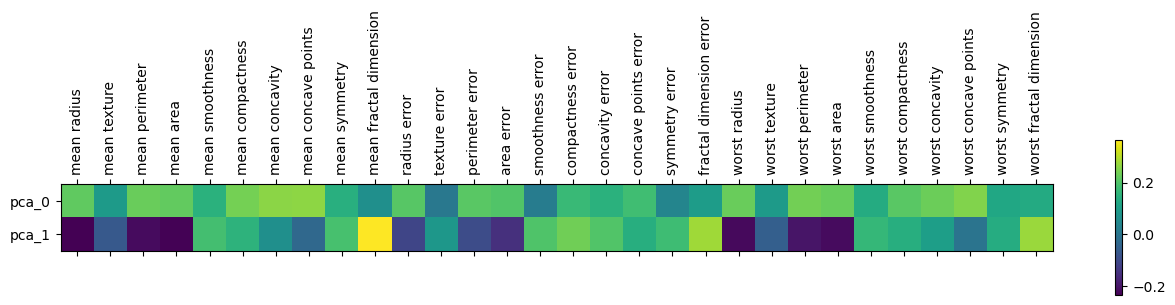

In [27]:
plt.matshow(pca.components_)
plt.xticks(ticks=range(pca.components_.shape[1]), labels=feature_names, rotation='vertical')
plt.yticks(ticks=range(pca.n_components_), labels=pca_names)
plt.colorbar()
plt.show()

In [30]:
# varijansa
pca.explained_variance_

array([13.1425886,  5.9362313])

In [31]:
# udeo objasnjene varijanse
pca.explained_variance_ratio_

array([0.43705792, 0.19740988])

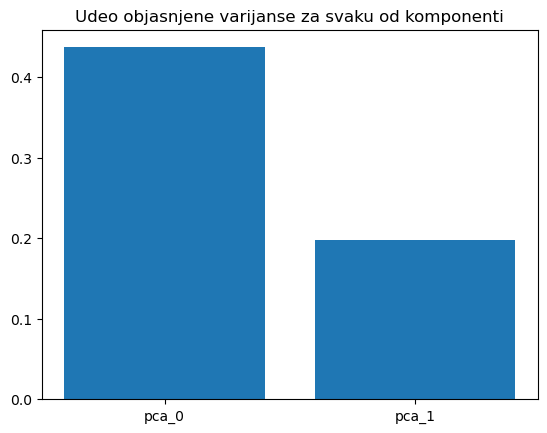

In [32]:
plt.bar(x=pca_names, height=pca.explained_variance_ratio_)
plt.title('Udeo objasnjene varijanse za svaku od komponenti')
plt.show()

In [33]:
X_train_pca = pca.transform(X_train)

In [34]:
X_test_pca = pca.transform(X_test)

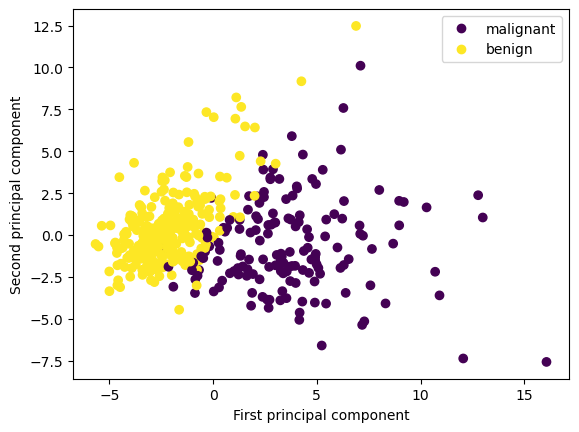

In [37]:
scatter = plt.scatter(X_train_pca[:,0], X_train_pca[:, 1], c=y_train)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.legend(handles=scatter.legend_elements()[0], labels=class_names.tolist())
plt.show()